# ADM Homework2 - Group #13

### Mohammad Mehdi Razavi, mohammadmehdirazavi97@gmail.com, 2023856

### Salim Sikder , sikder.1754346@studenti.uniroma1.it , 1754346

### Luca Mattei , mattei.1852190@studenti.uniroma1.it 1852190


## Loading and cleaning the main data and bonus data

First we import the libraries.
Then we have a function to change the timestamps into pd_datetime. We use this function to parse the main data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# We had to do some data engineering for parsing the dates and time for selected three columns.
def dateparse(time_in_secs) :
    return pd.to_datetime(time_in_secs, unit='s')

In [2]:
# load main data set
dataset_main = pd.read_csv('./data/steam_reviews.csv', header='infer',
                      parse_dates = ['timestamp_created', 'timestamp_updated', 'author.last_played'],
                      date_parser = dateparse, low_memory=False)

In [3]:
dataset_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   Unnamed: 0                      int64         
 1   app_id                          int64         
 2   app_name                        object        
 3   review_id                       int64         
 4   language                        object        
 5   review                          object        
 6   timestamp_created               datetime64[ns]
 7   timestamp_updated               datetime64[ns]
 8   recommended                     bool          
 9   votes_helpful                   int64         
 10  votes_funny                     int64         
 11  weighted_vote_score             float64       
 12  comment_count                   int64         
 13  steam_purchase                  bool          
 14  received_for_free               bool          
 

## Load the bonus data

After loading the bonus data we saw that there are some differences compared to the main data.
The columns related to the timestamps were mixed types of float and string. Also we have some differences in other columns.
So we use a function(Convert_dtype) to change the types of these columns.
In addition, there was an extra column which we dropped. We do these things exactly for the second part of bonus data.

In [3]:
# for converting the object into the int64
# in some columns we have both float and string data type and even we have some strings that they dont represent a number 
# for example we have False saved as a string. and even we have a string like this : ' '
# so, first check if x is string we change it to float and then int. if it is a string like 'False' or ' ' 
# we return zero instead and then we drop these rows
# in the else part we just change the float number into int
def convert_dtype(x):
    if type(x) == str:
        try:
            return np.int64(np.float64(x))
        except:
            return 0
    else:
        return np.int64(x)

# for converting the object into the boolean
def convert_dtype1(x):
    if not x:
        return False
    try:
        return True   
    except:        
        return False
dataset_bonus1 = pd.read_csv('./data/steam_reviews_bonus_1.csv' , header='infer',
                             low_memory=False,
                             converters={'timestamp_updated': convert_dtype,
                                         'recommended':convert_dtype1,
                                         'votes_helpful':convert_dtype,
                                         'steam_purchase':convert_dtype1,
                                         'received_for_free':convert_dtype1,
                                         'written_during_early_access':convert_dtype1,
                                         'app_id': convert_dtype,
                                         'votes_funny':convert_dtype,
                                         'comment_count':convert_dtype,
                                         'author.steamid':convert_dtype,
                                         'author.num_games_owned':convert_dtype,
                                         'author.num_reviews':convert_dtype})


In [4]:
# droping the extra column

dataset_bonus1 = dataset_bonus1.drop( columns = ['Unnamed: 0.1'])

In [5]:
# change the timestamps columns to date time
i = dataset_bonus1[(dataset_bonus1.timestamp_updated == 0)].index
dataset_bonus1 = dataset_bonus1.drop(i)

dataset_bonus1['timestamp_created'] = pd.to_datetime(dataset_bonus1['timestamp_created'], unit='s')
dataset_bonus1['timestamp_updated'] = pd.to_datetime(dataset_bonus1['timestamp_updated'], unit='s')
dataset_bonus1['author.last_played'] = pd.to_datetime(dataset_bonus1['author.last_played'], unit='s')


In [7]:
dataset_bonus1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999996 entries, 0 to 10000003
Data columns (total 23 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   Unnamed: 0                      object        
 1   app_id                          int64         
 2   app_name                        object        
 3   review_id                       int64         
 4   language                        object        
 5   review                          object        
 6   timestamp_created               datetime64[ns]
 7   timestamp_updated               datetime64[ns]
 8   recommended                     bool          
 9   votes_helpful                   int64         
 10  votes_funny                     int64         
 11  weighted_vote_score             float64       
 12  comment_count                   int64         
 13  steam_purchase                  bool          
 14  received_for_free               bool          
 1

You can see a summary of the bonus data part1 above.

Now we load the second part of the bonus data and perform the exact operations on it.

In [6]:
dataset_bonus2 = pd.read_csv('./data/steam_reviews_bonus_2.csv' , header='infer',
                             low_memory=False,
                             converters={'timestamp_updated': convert_dtype,
                                         'recommended':convert_dtype1,
                                         'votes_helpful':convert_dtype,
                                         'steam_purchase':convert_dtype1,
                                         'received_for_free':convert_dtype1,
                                         'written_during_early_access':convert_dtype1,
                                         'app_id': convert_dtype,
                                         'votes_funny':convert_dtype,
                                         'comment_count':convert_dtype,
                                         'author.steamid':convert_dtype,
                                         'author.num_games_owned':convert_dtype,
                                         'author.num_reviews':convert_dtype})

In [7]:
# droping the extra column

dataset_bonus2 = dataset_bonus2.drop( columns = ['Unnamed: 0.1'])

In [8]:
# change the timestamps columns to date time

i = dataset_bonus2[(dataset_bonus2.timestamp_updated == 0)].index
dataset_bonus2 = dataset_bonus2.drop(i)

dataset_bonus2['timestamp_created'] = pd.to_datetime(dataset_bonus2['timestamp_created'], unit='s')
dataset_bonus2['timestamp_updated'] = pd.to_datetime(dataset_bonus2['timestamp_updated'], unit='s')
dataset_bonus2['author.last_played'] = pd.to_datetime(dataset_bonus2['author.last_played'], unit='s')


In [11]:
dataset_bonus2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999996 entries, 0 to 7000003
Data columns (total 23 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   Unnamed: 0                      object        
 1   app_id                          int64         
 2   app_name                        object        
 3   review_id                       int64         
 4   language                        object        
 5   review                          object        
 6   timestamp_created               datetime64[ns]
 7   timestamp_updated               datetime64[ns]
 8   recommended                     bool          
 9   votes_helpful                   int64         
 10  votes_funny                     int64         
 11  weighted_vote_score             float64       
 12  comment_count                   int64         
 13  steam_purchase                  bool          
 14  received_for_free               bool          
 15

### Merge all three parts.

In [9]:
frames = [dataset_main, dataset_bonus1, dataset_bonus2]

dataset = pd.concat(frames)

# Research questions


# RQ1
After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our dataset? Please summarize its main characteristics with visual and tabular methods.

In [13]:
dataset.shape

(38747363, 23)

In [12]:
dataset.drop_duplicates()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03.000000000
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27.000000000
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17.000000000
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44.000000000
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999999,6999995,323190,Frostpunk,46994790,spanish,Frio y nieve : 10/10\nPunk: 9/10\n\nCumple con...,2018-06-08 19:40:34,1970-01-01 00:00:00,True,1,...,True,True,True,76561197913314939,35,1,4064.0,0.0,1287.0,2018-02-06 17:06:43.719246336
7000000,6999996,323190,Frostpunk,46994076,english,Good fun but not much replayability so limited...,2014-02-13 18:52:47,1970-01-01 00:00:00,True,1,...,True,True,True,76561197861661016,8,1,343.0,0.0,235.0,2013-10-23 06:25:56.117700352
7000001,6999997,323190,Frostpunk,46993891,english,===[ Audience: ]===\nKids \nEveryone\nCasual ...,2018-12-19 19:51:59,1970-01-01 00:00:00,True,0,...,True,True,True,76561197876266689,62,4,1299.0,0.0,1200.0,2018-07-08 15:27:23.052892672
7000002,6999998,323190,Frostpunk,46993752,spanish,Excelente!.,2003-05-03 13:04:29,1970-01-01 00:00:00,True,0,...,True,True,True,76561197908075933,91,3,1680.0,0.0,910.0,2003-03-13 22:50:57.968475520


### After cheking wheter there is any repeated row in data, we write the whole data into one file in order to be easier to work on data for the next times.

In [12]:
# dataset.to_csv('./data/dataset.csv')

In [17]:
# # for the second run we read one single csv file.
# # this part is optional. we did this for not have to read and change the columns type of bonus data each time.

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# # We had to do some data engineering for parsing the dates and time for selected three columns.
# def dateparse(time_in_secs) :
#     return pd.to_datetime(time_in_secs, unit='s')
# dataset = pd.read_csv('./data/dataset.csv', header='infer',
#                       parse_dates = ['timestamp_created', 'timestamp_updated', 'author.last_played'],
#                       date_parser = dateparse, low_memory=False)

Our data set has 23 columns and 38,747,363  rows.

In [14]:
# A brief summary of our data to get a better understanding of data.
# Here we can see that out of 23 columns, we have 4 boolean, 5 float,
# 11 integer and 3 object.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38747363 entries, 0 to 7000003
Data columns (total 23 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   Unnamed: 0                      object        
 1   app_id                          int64         
 2   app_name                        object        
 3   review_id                       int64         
 4   language                        object        
 5   review                          object        
 6   timestamp_created               datetime64[ns]
 7   timestamp_updated               datetime64[ns]
 8   recommended                     bool          
 9   votes_helpful                   int64         
 10  votes_funny                     int64         
 11  weighted_vote_score             float64       
 12  comment_count                   int64         
 13  steam_purchase                  bool          
 14  received_for_free               bool          
 1

<AxesSubplot:xlabel='app_name'>

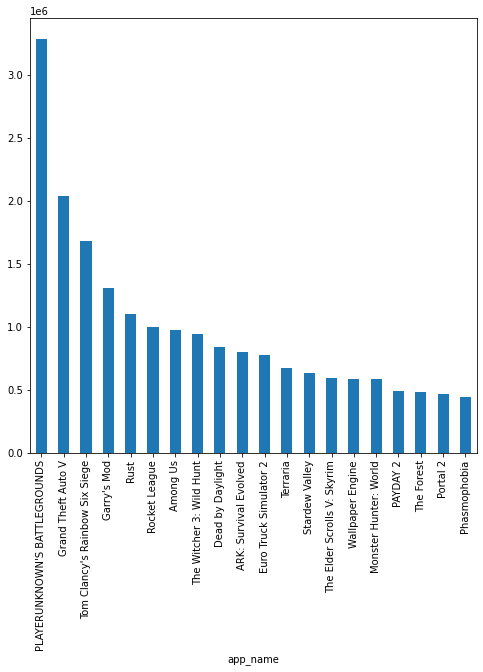

In [15]:
# names of top 20 games which got the most reviews.
dataset.groupby('app_name').review_id.count().sort_values(ascending=False).head(20).plot.bar(figsize = (8,8))


<AxesSubplot:ylabel='app_id'>

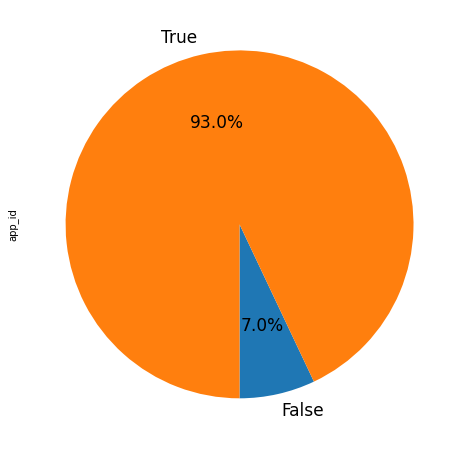

In [16]:
# Percentage of the reviews that recommended the game.
ax = plt.subplot(111)
dataset.groupby('recommended').count().app_id.plot(kind='pie', ax=ax, autopct='%1.1f%%',\
                                                   figsize=(8,8),startangle=270, fontsize=17)

In [17]:
# Usefull reviews.(based on the 'helpful' tag)
dataset.sort_values(ascending = False, by = 'votes_helpful').head(10)[['review_id','votes_helpful']]

,review_id,votes_helpful
10751984,63684360,4398046511106
2071183,37023774,4398046511106
10449392,23973728,4398046511104
3125114,61025014,4398046511104
5806427,32334698,29608
4276395,56877039,29608
7824298,8445609,28211
7914834,41359655,28211
20261550,31396746,26149
15079531,36686133,19927


By looking at the above table you can see that the first 4 rows seem not to be right. So we should remove these 4 rows.

In [10]:
dataset = dataset.drop([10751984,10449392,2071183,3125114])


In [19]:
dataset.sort_values(ascending = False, by = 'votes_helpful').head(10)[['review_id','votes_helpful']]

,review_id,votes_helpful
5806427,32334698,29608
4276395,56877039,29608
7914834,41359655,28211
7824298,8445609,28211
20261550,31396746,26149
2513056,51624184,19927
15079531,36686133,19927
19415901,18488599,19707
6250541,54993096,18030
14682182,42400519,18030


Now it seems right

In [20]:
# which reviews got the most votes as 'funny'
dataset.sort_values(ascending = False, by = 'votes_funny').head(50)[['review_id','votes_funny']]

,review_id,votes_funny
9956101,58427222,4294967295
376209,32891513,4294967295
406534,27496248,4294967295
21624736,32310758,4294967295
19319853,28266147,4294967295
21299657,29673473,4294967295
16220385,32926879,4294967295
19276884,32448682,4294967295
2594674,59560093,4294967295
13511985,32798128,4294967295


We have the same issue for votes_funny column. So we set a threshold based on values and filter the data.

In [11]:
i = dataset[(dataset.votes_funny > 4294967200)].index

dataset = dataset.drop(i)


We calculate the votes_funny one more time.

In [22]:
# which reviews got the most votes as 'funny'
dataset.sort_values(ascending = False, by = 'votes_funny').head(10)[['review_id','votes_funny']]

,review_id,votes_funny
4781032,40725764,22532
15079531,36686133,22532
5161050,49683888,16012
241129,54252087,16012
14962872,38425732,15707
1608202,64275695,15707
16875345,25085256,15417
1398215,11079632,15417
3267103,47723883,14376
2509606,63047506,14376


In [23]:
# Which reviews were the most controversial. (Based on the number of comments received)
dataset.sort_values(ascending = False, by = 'comment_count').head(10)[['review_id','comment_count']]

,review_id,comment_count
20444210,29914880,4893
16913851,24849441,1432
3504535,33169220,1432
3140621,60511823,1235
14916749,38721579,1235
20261550,31396746,1143
17308491,19228643,1034
17332943,18981681,1026
4498381,83579989,929
9375898,42395857,929


In [24]:
dataset.sort_values(ascending = False, by = 'author.num_reviews').head(10)[['author.steamid','author.num_reviews']]


,author.steamid,author.num_reviews
1970995,76561197903094752,4398046511108
13093694,76561198103272004,4398046511108
5663041,76561198848008157,4398046511105
1283698,76561197873406848,4398046511105
520259,76561197928046576,5236
20635080,76561198125392509,5236
3077805,76561197960239216,5236
5182470,76561197867222656,5236
8067284,76561198125392509,5236
1258197,76561198125392509,5236


Just like before we have to drop the first four rows.
Here we just chek the number of reviews to be normal. In the RQ5 we will discuss this more.

In [12]:
dataset = dataset.drop([13093694,5663041,1283698,1970995])

<AxesSubplot:ylabel='app_id'>

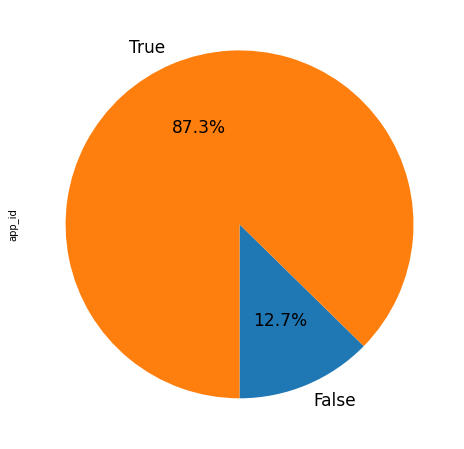

In [26]:
# Percentage of whether the author of review purchased the game or not.
dataset.groupby('steam_purchase').count().app_id.plot(kind = ('pie'),autopct='%1.1f%%',\
                                                      figsize=(8,8),startangle=270, fontsize=17 )


In [27]:
# which user own more games than the others.
dataset[['author.steamid','author.num_games_owned']].\
sort_values(ascending = False, by='author.num_games_owned').head(10)

,author.steamid,author.num_games_owned
5502449,76561198039421205,4398046511619
3407912,76561197951833904,4398046511619
21079021,76561198148961412,4398046511316
3507697,76561198242864522,4398046511179
4165326,76561197903412608,4398046511179
3273665,76561197958887936,4398046511170
8680945,76561198070649181,4398046511170
6913009,76561198127787009,4398046511151
9266316,76561197929051312,4398046511151
5790335,76561198028121353,24258


Here we have the same issue and we have to drop some rows. We set a threshold based on values.

In [13]:
i = dataset[(dataset['author.num_games_owned'] > 4398046511100)].index

dataset = dataset.drop(i)

Now we sort the values one more time.

In [29]:
# which user own more games than the others.
dataset[['author.steamid','author.num_games_owned']].\
sort_values(ascending = False, by='author.num_games_owned').head(10)

,author.steamid,author.num_games_owned
5790335,76561198028121353,24258
7308765,76561197938819680,24258
3487865,76561197933943584,24184
5242234,76561198028121353,24184
4669613,76561197924223344,24172
4418318,76561198028121353,24172
17742447,76561197979911851,22024
20632981,76561197979911851,22023
20679539,76561197979911851,22019
6245475,76561197938857536,21980


In [30]:
# Most time the authors spent in the reviewd game.(Lifetime)
dataset[['app_name','author.steamid','author.playtime_forever']].\
sort_values(ascending = False, by = 'author.playtime_forever').head(10)


,app_name,author.steamid,author.playtime_forever
1261973,The Elder Scrolls V: Skyrim,76561197862491648,3744943.0
11261972,The Elder Scrolls V: Skyrim,76561197992128065,3744943.0
1576588,Sid Meier's Civilization V,76561198030806709,3470649.0
1576589,Sid Meier's Civilization V,76561197919021632,3470649.0
1553967,Garry's Mod,76561197878183488,3345621.0
1553966,Garry's Mod,76561198067113260,3345621.0
541373,Counter-Strike: Source,76561197907593856,3336152.0
541372,Counter-Strike: Source,76561198080500547,3336152.0
1638436,Sid Meier's Civilization V,76561197877398704,3323263.0
1638435,Sid Meier's Civilization V,76561198030129768,3323263.0


Untill now we checked the values of some columns and we drop some of rows which had irrelevant values.

## RQ2
Let's explore the dataset by finding simple insights into the reviews.
- Plot the number of reviews for each application in descending order.
- What applications have the best Weighted Vote Score?
- Which applications have the most and the least recommendations?
- How many of these applications were purchased, and how many were given for free?

<AxesSubplot:xlabel='app_name'>

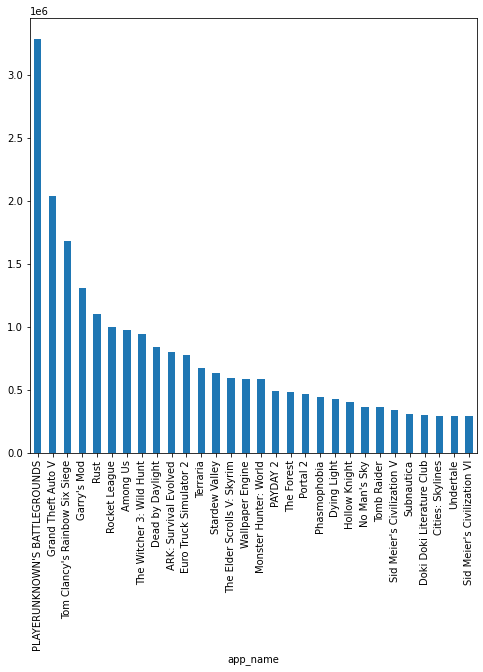

In [31]:
# number of reviews of each application in desc order
# we plot the top 30
dataset.groupby('app_name').review_id.count().sort_values(ascending=False).head(30).plot.bar(figsize = (8,8))


In [32]:
######---------best weighted vote score------######
# we had to use groupby function by the app name and then we had to take the average of all
# the weighted votes for each application. Then we sorted them on descending orders
dataset.groupby('app_name').weighted_vote_score.mean().sort_values(ascending=False)

app_name
Hunt Down The Freeman                0.502150
Urban Empire                         0.438623
METAL GEAR SURVIVE                   0.421632
Identity                             0.415384
Umbrella Corps                       0.414678
                                       ...   
There Is No Game: Wrong Dimension    0.086059
Bloons TD 6                          0.084868
People Playground                    0.083486
Among Us                             0.078233
Totally Accurate Battle Simulator    0.076891
Name: weighted_vote_score, Length: 315, dtype: float64

In [33]:
######---------------most and least recommendations application------------######
# here we had to find out the applications if they are recommended or not. We have used those values and
# filterd the dataset and then basic counting and the highest values of recommended apps and then not
# recommended apps.
# those are the most recommended applications
dataset[['recommended','app_name']][dataset.recommended == True].groupby('app_name').\
recommended.count().sort_values(ascending=False)

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     2530517
Grand Theft Auto V                1850299
Tom Clancy's Rainbow Six Siege    1584210
Garry's Mod                       1287981
Rust                              1017903
                                   ...   
WWE 2K17                              922
Urban Empire                          759
Out of the Park Baseball 19           594
DRAGON QUEST HEROES™ II               423
Neon Hardcorps                        289
Name: recommended, Length: 315, dtype: int64

In [34]:
# those are the least recommended ( voted as not recommended) values
dataset[['recommended','app_name']][dataset.recommended == False].groupby('app_name').\
recommended.count().sort_values(ascending=False)

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS      757825
Grand Theft Auto V                 187774
Tom Clancy's Rainbow Six Siege      99513
ARK: Survival Evolved               84756
Rust                                80175
                                    ...  
Nova Drift                             65
A Short Hike                           50
Senren＊Banka                           30
ULTRAKILL                              26
Don't Escape: 4 Days to Survive        15
Name: recommended, Length: 315, dtype: int64

In [35]:
######-------------purchase and given for free---------############
# dataset[dataset.steam_purchase == True].app_id.nunique()
dataset[['steam_purchase','app_id']][dataset.steam_purchase == True].app_id.nunique()

315

In [36]:

dataset[['received_for_free','app_id']][dataset.received_for_free == True].app_id.nunique()

315

# RQ3
Now it's important to understand the preferred time to do reviews.

- What is the most common time that authors review an application? For example, authors usually write a review at 17:44.
- Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.
- Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:
| Initial time | Final time |
|---|---|
| 06:00:00 | 10:59:59 |
| 11:00:00 | 13:59:59 |
| 14:00:00 | 16:59:59 |
| 17:00:00 | 19:59:59 |
| 20:00:00 | 23:59:59 |
| 00:00:00 | 02:59:59 |
| 03:00:00 | 05:59:59 |

In [37]:
# 1. What is the most common time that authors review an application? 
# For example, authors usually write a review at 17:44.

# If we do the calculations accurately in seconds we get the result below
dataset.timestamp_created.dt.time.value_counts().sort_values(ascending=False).head(10)


15:54:53    795
14:42:19    608
15:24:50    607
14:45:11    600
14:46:53    596
17:56:41    593
14:50:37    592
15:52:51    592
14:27:29    588
16:00:20    588
Name: timestamp_created, dtype: int64

In [38]:
# But it is better to round the times into minute percision and then get the most common time authors review an application
dataset.timestamp_created.dt.round('min').dt.time.\
value_counts().sort_values(ascending=False).head(10)

14:52:00    31604
15:04:00    31555
14:38:00    31503
14:50:00    31475
15:10:00    31469
15:08:00    31452
15:06:00    31449
15:14:00    31427
15:16:00    31422
15:20:00    31410
Name: timestamp_created, dtype: int64

In [39]:
# 2. Create a function that receives as a parameter a list of time intervals
# and returns the plot the number of reviews for each of the intervals.

def barplot_time_intervals(times):
    numbers = []
    for i in range(0, len(times), 2):
        numbers.append(dataset[(dataset.timestamp_created.dt.time > times[i]) &\
                       (dataset.timestamp_created.dt.time < times[i+1])].count().app_id)
    index = []
    for i in range(0,len(times),2):
        index.append(str(times[i]) + ' - ' + str(times[i+1]))
    fig, ax = plt.subplots(figsize =(16, 9))
    ax.barh(index, numbers)
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')
    plt.ylabel('Time Intervals')
    plt.xlabel('No. of comments')
    plt.title('plot of the number of reviews for each of the intervals.')
    plt.show()

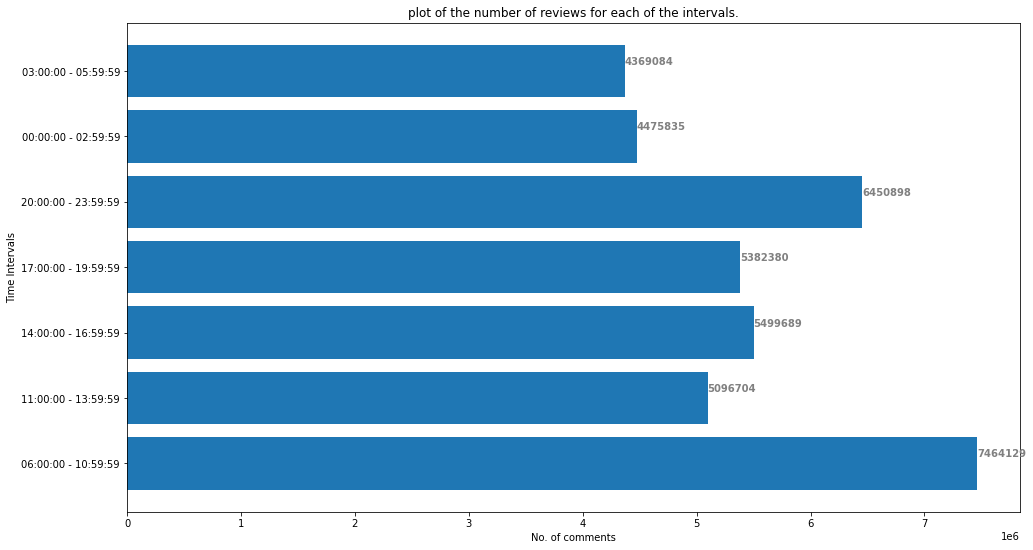

In [40]:
times = pd.Series(['06:00:00', '10:59:59','11:00:00', '13:59:59',
         '14:00:00', '16:59:59',
         '17:00:00', '19:59:59',
         '20:00:00', '23:59:59',
         '00:00:00', '02:59:59',
         '03:00:00', '05:59:59'])
times1 = pd.to_datetime(times).dt.time
barplot_time_intervals(times1)


# RQ4
As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

- What are the top 3 languages used to review applications?
- Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.
- Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?
- Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

In [14]:
######-------Top 3 languages used to review-------######
dataset.groupby('language').review_id.count().sort_values(ascending=False).head(3)

language
english     17023011
schinese     6839135
russian      4168053
Name: review_id, dtype: int64

In [42]:
######------functions for filtering the dataset for selected languages of reviews-----######
#this function take 2 inputs : dataset name and the list of the languages.
def RevLan(ds,lst):
    return (ds.query('language in @lst'))
RevLan(dataset,['italian','spanish','schinese'])
    

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03.000000000
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27.000000000
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17.000000000
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49.000000000
8,8,292030,The Witcher 3: Wild Hunt,85183227,schinese,年度最佳的作品，没啥好夸的，神作,2021-01-23 04:55:03,2021-01-23 04:55:03,True,0,...,True,False,False,76561198130808993,581,17,6921.0,222.0,6921.0,2021-01-22 12:07:55.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999985,6999981,323190,Frostpunk,47000636,schinese,好玩。,2001-05-28 04:21:38,2001-05-28 04:21:38,True,0,...,True,True,True,76561197945461264,4,2,2967.0,0.0,2618.0,2000-12-07 05:33:09.969569792
6999988,6999984,323190,Frostpunk,47000152,schinese,不错的游戏，就是没有什么能重复玩的地方,2018-12-05 15:49:39,2018-12-05 15:49:39,True,0,...,True,True,True,76561197887864032,753,32,879.0,0.0,727.0,2018-06-02 11:23:50.743585792
6999990,6999986,323190,Frostpunk,46997928,spanish,Muy buen juego.\nTe introduce en un mundo que ...,2017-09-04 00:32:04,2017-09-04 00:32:04,True,1,...,True,True,True,76561197915327264,164,1,2939.0,0.0,1406.0,2017-02-07 02:04:30.546807808
6999999,6999995,323190,Frostpunk,46994790,spanish,Frio y nieve : 10/10\nPunk: 9/10\n\nCumple con...,2018-06-08 19:40:34,2018-06-08 19:40:34,True,1,...,True,True,True,76561197913314944,35,1,4064.0,0.0,1287.0,2018-02-06 17:06:43.719246336


In [43]:
#########--------Percentage of reviews that voted as funny -------#######
#here we have used our previous created function RevLan to subfilter our main dataset
newds = RevLan(dataset,['english','russian','schinese'])
# then for finding the percentage of reviews voted as funny we had to do simple math calculation after
# finding out the total reviews and reviews voted as funny.
tot = newds.review_id.count()
funny = newds[newds.votes_funny != 0].review_id.nunique()
funnyPer = ((funny/tot)*100)
print ('{}% of these reviews were voted as funny!'.format(funnyPer))

11.20617445491557% of these reviews were voted as funny!


In [ ]:
#######******Percentage of reviews that voted as helpful-----######
# the same procedure of the previous one.
helpful = newds[newds.votes_helpful != 0].review_id.nunique()
helpfulPer = ((helpful/tot)*100)
print ('{}% of these reviews were voted as helpful!'.format(helpfulPer))

# RQ5
The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.

- Plot the top 10 most popular reviewers and the number of reviews.
- What applications did the most popular author review?
- How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.
- How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?


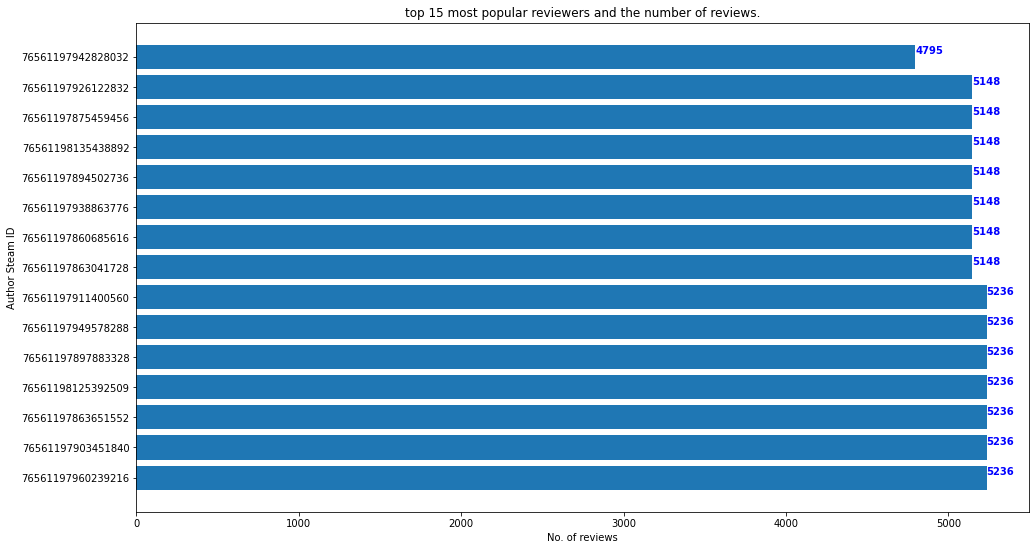

In [28]:
# top 10 most popular reviewers and the number of reviews.
# We calculated the popularity based on the number of reviews
# first use a subset of dataset(because we only need 'author.num_reviews' and 'author.steamid') and then drop the duplicate rows
# by considering the steamid
# then we sort the number of reviews and plot the top 15

df2 = dataset[['author.num_reviews', 'author.steamid']].drop_duplicates(subset=['author.steamid']).\
sort_values(ascending = False,  by = 'author.num_reviews').head(15)

index = list(map(str,df2['author.steamid']))
numbers = list(map(int,df2['author.num_reviews']))
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(index, numbers)
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='blue')
plt.ylabel('Author Steam ID')
plt.xlabel('No. of reviews')
plt.title('top 15 most popular reviewers and the number of reviews.')
plt.show()

In [25]:
# What applications did the most popular author review?
# we use index which is calculated in the previous block to get the steamid of author

most_popular_author = index[0]
popular_author = dataset[dataset['author.steamid'] == int(most_popular_author)]
popular_author.app_name

3077805            NBA 2K18
7791405                Rust
8234103               Hades
496074     The Walking Dead
Name: app_name, dtype: object

In [26]:
# How many applications did he purchase, and how many did he get as free? 
# Provide the number (count) and the percentage
free = popular_author.received_for_free.count()
purchased = popular_author.steam_purchase.count()
total = popular_author['author.num_games_owned'].iloc[0]

print('Number of applications he purchased: ' + str(purchased) +\
      '. equal to ' +str(100*purchased/total) +' %')
print('Number of applications he got free: ' + str(free) +\
      '. equal to ' +str(100*free/total) +' %')


Number of applications he purchased: 4. equal to 25.0 %
Number of applications he got free: 4. equal to 25.0 %


In dataset we have some rows like this: received_for_free = False, steam_purchase = False
Actually, we don't know how the author got the game.

In [27]:
# How many of the applications he purchased reviewed positively, and how many negatively? 
# How about the applications he received for free?
popular_author_purchased = popular_author[popular_author.steam_purchase == True]
popular_author_free = popular_author[popular_author.received_for_free == True]
print(popular_author_purchased[popular_author_purchased.recommended == True].count().app_id)
print(popular_author_purchased[popular_author_purchased.recommended == False].count().app_id)
print(popular_author_free[popular_author_free.recommended == True].count().app_id)
print(popular_author_free[popular_author_free.recommended == False].count().app_id)


4
0
4
0


# RQ6
It's time to get information from the updates that a user does to his reviews.

- What is the average time (days and minutes) a user lets pass before he updates a review?
- Plot the top 3 authors that usually update their reviews.


In [33]:
####------ Average time a user lets pass before he updates a review-----#######

In [15]:
# first we find out which reviews have been updated by checking review time created and updated column. We find
# the difference and record it in a new column.
# because of some issues in bonus data we have some rows in which when we calculate the difference between review time and 
# update time we'll get the value below zero. So we should drop these rows.
dataset['updateDiff'] = dataset['timestamp_updated'] - dataset['timestamp_created']
i = dataset[(dataset['updateDiff'] < ('0 days 00:00:00'))].index
dataset =  dataset.drop(i)

In [70]:
# ofcourse the minimum difference is zero when the review has never been updated.
dataset.updateDiff.min()

Timedelta('0 days 00:00:00')

In [73]:
# now we filter the dataset just for the rows that have real updated reviews
# remember that we will not consider the rows that has the same timestamp_created & timestamp_updated value.
dataset[(dataset.updateDiff > ('0 days 00:00:00'))].updateDiff.mean()

Timedelta('183 days 23:10:21.379212552')

In [47]:
####--------plot the top 3 authors that usually update their review-------#####

<AxesSubplot:xlabel='author.steamid'>

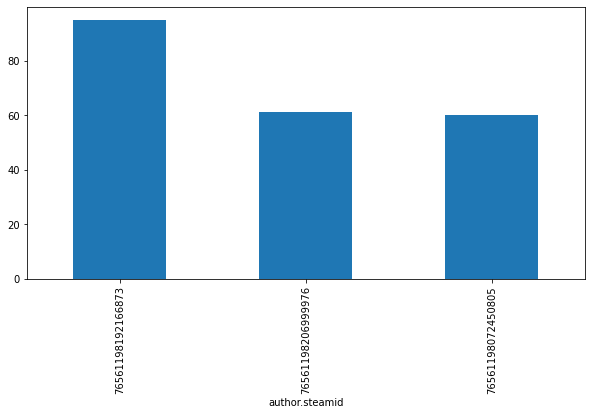

In [76]:
# here we have used groupby function to count all the reiews done by each authors and than we have sorted
# them in descending order. Then we took the top 3 of them for plotting.
dataset[(dataset.updateDiff > ('0 days 00:00:00'))].groupby('author.steamid').\
review_id.count().sort_values(ascending=False).head(3).plot.bar(figsize=(10,5))

# RQ7
Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.

- What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?
- What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?
- Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

In [77]:
p=round((sum(dataset['weighted_vote_score']>=0.5)/len(dataset['weighted_vote_score']))*100,2)  #frequentist method
print(f'The probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is {p}%')

The probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is 21.75%


In [78]:
p1=round((sum((dataset['weighted_vote_score']>0.5)&(dataset['votes_funny']>=1))/sum(dataset['weighted_vote_score']>0.5))*100,2) #freq. method
print(f'The probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is {p1}%')

The probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is 19.07%


In [79]:
p2=round((sum(dataset['votes_funny']>=1)/len(dataset['votes_funny']))*100,2) #frequentist method
print(f'The probability that a review has at least one vote as funny is {p2}%')
p3=round((sum((dataset['weighted_vote_score']>=0.5)&(dataset['votes_funny']>=1))/sum(dataset['weighted_vote_score']>=0.5))*100,2) #freq. method
print(f'The probability that a review has at least one vote as funny given that the Weighted Vote Score is equal to or bigger than 0.5 is {p3}%')

The probability that a review has at least one vote as funny is 11.67%
The probability that a review has at least one vote as funny given that the Weighted Vote Score is equal to or bigger than 0.5 is 19.03%


$Pr(\text{a review has at least one vote as funny})$ is not independent of $Pr(\text{a review has a Weighted Vote Score equal or bigger than 0.5})$: in fact $Pr(\text{a review has at least one vote as funny})\not= Pr(\text{a review has at least one vote as funny|a review has a Weighted Vote Score equal or bigger than 0.5})$.

# RQ8
Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check if a hypothesis is correct or not.

- Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.
- Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.
- Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.
- What are histograms, bar plots, scatterplots and pie charts used for?
- What insights can you extract from a Box Plot?

In [80]:
import scipy.stats

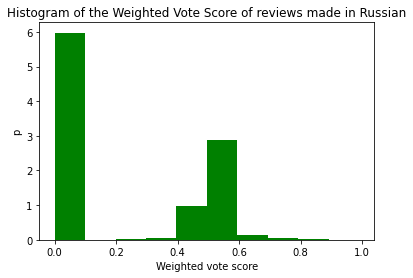

In [81]:
a=dataset['weighted_vote_score'][dataset['language']=='russian']
plt.hist(a, density=True, color='green')
plt.xlabel('Weighted vote score')
plt.ylabel('p')
plt.title('Histogram of the Weighted Vote Score of reviews made in Russian')
plt.show()

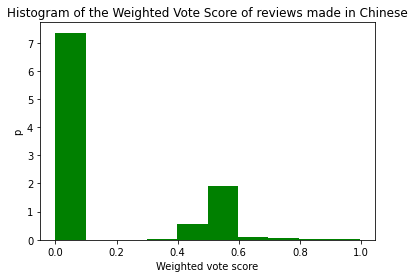

In [82]:
b=dataset['weighted_vote_score'][((dataset['language']=='schinese')|(dataset['language']=='tchinese'))]
plt.hist(b, density=True, color='green')
plt.xlabel('Weighted vote score')
plt.ylabel('p')
plt.title('Histogram of the Weighted Vote Score of reviews made in Chinese')
plt.show()

In [83]:
scipy.stats.kruskal(a,b).pvalue>0.05

False

Even if the two histograms may look pretty similar, there is a significant difference in the Weighted Vote Score of reviews made in Chinese and the ones made in Russian. In fact, using the Kruskal Wallistest, we refuse the null hypothesis (which says that the two samples came from the same distribution), with a p-value smaller than 0.05. This test is a non parametric test which verify the equality of the medians.

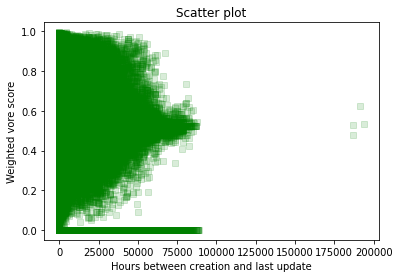

In [84]:
c=dataset['weighted_vote_score']
d=(dataset['timestamp_updated']-dataset['timestamp_created']).astype('timedelta64[h]')
plt.scatter(d,c, c='green', alpha=0.15, marker=',')
plt.title('Scatter plot')
plt.xlabel('Hours between creation and last update')
plt.ylabel('Weighted vore score')
plt.show()

In [85]:
reg1=scipy.stats.linregress(d,c)
print(f'Intercept         = {reg1.intercept}')
print(f'Coeff             = {reg1.slope}')
print(f'Correlation coeff = {reg1.rvalue}')

Intercept         = 0.15968180254878486
Coeff             = 3.969901547669898e-06
Correlation coeff = 0.05399854427983151


From the scatter plot it doesn't seem to be a relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score. In fact the correlation coefficient is pretty close to 0.

In [86]:
print(f'Spearman colleration coefficient = {scipy.stats.spearmanr(d,c).correlation}')

Spearman colleration coefficient = 0.05758080202269502


Moreover the Spearman's correlation coefficient is pretty close to 0, which means there is not a significant reletionship between the two variables.

### Recommended application

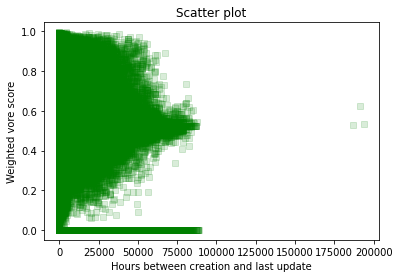

In [87]:
p=dataset['weighted_vote_score'][dataset['recommended']==True]
q=(dataset['timestamp_updated'][dataset['recommended']==True]-
   dataset['timestamp_created'][dataset['recommended']==True]).astype('timedelta64[h]')
plt.scatter(q,p, c='green', alpha=0.15, marker=',')
plt.title('Scatter plot')
plt.xlabel('Hours between creation and last update')
plt.ylabel('Weighted vore score')
plt.show()

In [88]:
reg2=scipy.stats.linregress(q,p)
print(f'Intercept            = {reg2.intercept}')
print(f'Coeff                = {reg2.slope}')
print(f'Correlation coeff    = {reg2.rvalue}')

Intercept            = 0.1505982220236375
Coeff                = 4.136490762827926e-06
Correlation coeff    = 0.0546344884174312


In [89]:
print(f'Spearman colleration coefficient = {scipy.stats.spearmanr(q,p).correlation}')

Spearman colleration coefficient = 0.05888567996702373


### Not recommended application


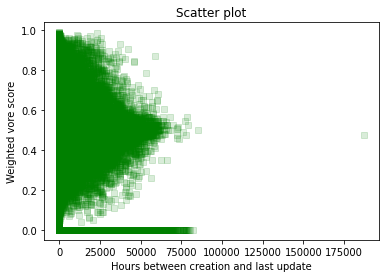

In [90]:
u=dataset['weighted_vote_score'][dataset['recommended']==False]
v=(dataset['timestamp_updated'][dataset['recommended']==False]-
   dataset['timestamp_created'][dataset['recommended']==False]).astype('timedelta64[h]')
plt.scatter(v,u, c='green', alpha=0.15, marker=',')
plt.title('Scatter plot')
plt.xlabel('Hours between creation and last update')
plt.ylabel('Weighted vore score')
plt.show()

In [91]:
reg3=scipy.stats.linregress(v,u)
print(f'intercept            = {reg3.intercept}')
print(f'coeff                = {reg3.slope}')
print(f'Correlation coeff    = {reg3.rvalue}')

intercept            = 0.2832376921352378
coeff                = -9.47187719476955e-08
Correlation coeff    = -0.001792690534084652


In [92]:
print(f'Spearman colleration coefficient = {scipy.stats.spearmanr(v,u).correlation}')

Spearman colleration coefficient = 0.046040590657659905


Even checking for the variable 'recommended', there isn't a significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score; this is proven by the previous study, where both the Spearman's correlation coefficients are close to 0.

### Histograms, Barplots, Scatterplots and Piecharts

- Histograms are used to graphically represent the distribution of a continuos variable.
- Barplots are used to graphically represent the distribution of a discrete variable.
- Scatterplots are used to represent all the observations on a Cartesian space, where each axis represent a variable.
- Piecharts are used to graphically represent the proportion of the modalities of a variable.

### Boxplot
From a boxplot you can extract the median, the first quartile and the third quartile. This means you can also observe the IQR(Inter Quartile Range). Moreover, if you're considering the outliers, you can also observe the range.

At last after dropping some rows we check the data shape one more time. So from 38,747,363 rows we kept 38,745,014

In [17]:
dataset.shape

(38745014, 24)

# Theoretical Questions


# TQ1
We are given the following algorithm.
1. What does the algorithm compute?
2. What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?
3. What is asymptotically the running time of the algorithm in the best case?


## Answer



Given *A*, an array of integers, and *k*, an integer at most equal to the length of the array, this algorithm returns the element *s* of the array which guarantees that the number of the elements of the array at most equal to *s* is exactly *k*. This algorithm use recursion.

In the worst case the function runs exactly *n* times and the size of the array decrease by one in every step. In this case $T(n)=\sum\limits_{i=1}^{n} (ai + b)$ where *a* and *b* are costant. This means that $T(n)=a\frac{n(n+1)}{2} + nb$. Asymptotically $T(n)$ is in the order of $n^2$, therefore $T(n)=O(n^2)$.
Moreover, if you **alaways** pick the max of the array as *s*, there will be an infinite loop; fortunately this is higly improbable.

In the best case, which is the case where you randomly pick the correct *s* in the first iteration of the function, the running time is in the order of *n* ( $T(n)=O(n)$ ).

# TQ2
You are given the recursive function splitSwap, which accepts an array a, an index i, and a length n.

function splitSwap(a, l, n):
  if n <= 1:
    return
  splitSwap(a, l, n/2)
  splitSwap(a, l+ n /2, n/2)
  swapList(a, l, n)


The subroutine swapList is described here:

function swapList(a, l, n):
  for i = 0 to n/2:
    tmp = a[l + i]
    a[l + i] = a[l + n/2 + i]
    a[l + n/2 + i] = tmp


1. How much running time does it take to execute splitSwap(a, 0, n)? (We want a Big O analysis.)
2. What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result.

*HINT*: Consider the scenario where len(a) and n are numbers that are a power of 2.

## Answer
When the *splitSwap* function has the argument *l* equal to 0, assuming that the length of the array is equal to the argument *n* which is a number that is a power of 2, we recall the function exactly $2\log_2 n$ times: everytime, till $n=1$ we divide *n* by 2 and in every run we recall the function 2 times. 

On the other hand the function *swaplist* is called in every run of *splitswap* and its running time is in the order of *n*.

Finally we can say that the running time of *splitswap(a, 0, n)* is in the order of $n\log n$, scilicet $T(n)=O(n\log n)$.


An example of the function:

In [51]:
def splitSwap(a, l, n):
    if n <= 1:                                            #check if the size is equal to one
        return
    splitSwap(a, l, n//2)                                 #recalls
    splitSwap(a, l+ n //2, n//2) 
    swapList(a, l, n)                                     #call swaplist

def swapList(a, l, n):
    for i in range(n//2):                                 #swap the values
        tmp = a[l + i] 
        a[l + i] = a[l + n//2 + i] 
        a[l + n//2 + i] = tmp 
    print(a)

In [52]:
a=[1, 2, 3, 4, 5, 6, 7, 8 ]
l=0
n=8
splitSwap(a, l, n)

[2, 1, 3, 4, 5, 6, 7, 8]
[2, 1, 4, 3, 5, 6, 7, 8]
[4, 3, 2, 1, 5, 6, 7, 8]
[4, 3, 2, 1, 6, 5, 7, 8]
[4, 3, 2, 1, 6, 5, 8, 7]
[4, 3, 2, 1, 8, 7, 6, 5]
[8, 7, 6, 5, 4, 3, 2, 1]


This function, given an array *a*, on each step divide the array in half and swap the two new objects, till the size of the new arrays is equal to one. The output is the inverted list. This algorithm is based on the *dividi et impera* method and it works like this:

$[A,B,C,D,E,F,G,H]$

$[E,F,G,H] \space [A,B,C,D]$

$[G,H] \space [E,F] \space [C,D] \space [A,B]$

$[H] \space [G] \space [F] \space [E] \space [D] \space [C] \space [B] \space [A]$

Obvoiusly this is not the optim algorithm to compute the reversed array: you can easily compute it using a single for cycle:

In [54]:
def rev(a):
    for i in range(len(a)//2):
        b=a[i]
        a[i]=a[-i-1]
        a[-i-1]=b
    print(a)

In [55]:
a=[1, 2, 3, 4, 5, 6, 7, 8 ]
rev(a)

[8, 7, 6, 5, 4, 3, 2, 1]


In this case $T(n)=O(n)$.

# TQ3
In the knapsack problem we are given n objects and each object i has a weight w_i and a value v_i. We are also given a weight budget W. The problem is to select a set of objects with total weight bounded by W that maximized the sum of their values. The following are three natural heuristics:

- Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded
- Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded
- Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded

For each of the heuristics, provide a counterexample, that is, an example of a problem instance in which the heuristic fails to provide the optimal solution.

## Answer

### Case1: 

Order the objects in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded.

**W**=100

| Obj | Weight | Value |
| :-: | :-: | :-: |
| 1 | 1 | 8 |
| 2 | 20 | 1 |
| 3 | 22 | 11 |
| 4 | 26 | 11 |
| 5 | 30 | 5 |
| 6 | 33 | 64 |
| 7 | 40 | 45 |
| 8 | 46 | 33 |
| 9 | 60 | 49 |
| 10 | 65 | 96 |

In this case the heuristic will fail to find the best solution: while the best solution for this knapsack problem is given by the objects 6 and 10 (with a total value of 160), this heuristic will return the objects 1, 2, 3, 4 and 5 as solution (with a total value of 36). In fact, if the value of the objects increase exponentially at the increasinig of their weight, this method will most likely fail.

### Case2: 

Order the objects in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded.

**W**=100

| Obj | Weight | Value |
| :-: | :-: | :-: |
| 1 | 87 | 71 |
| 2 | 75 | 69 |
| 3 | 69 | 67 |
| 4 | 60 | 66 |
| 5 | 30 | 65 |
| 6 | 21 | 55 |
| 7 | 16 | 40 |
| 8 | 13 | 33 |
| 9 | 10 | 32 |
| 10 | 8 | 31 |

In this case the heuristic will fail to find the best solution: the heuristic will return the objects 1 and 8 (with a total value of 104) as result while the best solution is given by the objects 5, 6, 7, 8, 9 and 10 (with a total value of 256). In fact, if the value of the objects doesn't decrease as much as the weight (linearly), this heuristic will most likely fail.

### Case3: 

Order the objects in decreasing relative value ($\frac{value_i}{weight_i}$), and then visit them sequentially, adding them to the solution if the budget is not exceeded.

**W**=100

| Obj | Weight | Value | $\frac{Value}{Weight}$ |
| :-: | :-: | :-: | :-:|
| 1 | 90 | 125 | 1.3$\overline8$ |
| 2 | 50 | 67 | 1.34 |
| 3 | 30 | 40 | 1.$\overline3$ |
| 4 | 20 | 24 | 1.2 |
| 5 | 99 | 99 | 1 |
| 6 | 100 | 90 | 0.9 |
| 7 | 80 | 60 | 0.75 |
| 8 | 90 | 45 | 0.5 |
| 9 | 100 | 20 | 0.2 |
| 10 | 10 | 1 | 0.1 |

In this case the heuristic will fail to find the best solution: while the best solution is given by the objects 2, 3 and 4 (with a total value of 131) the heuristic will return the objects 1 and 10 as solution (with a total value of 126). In fact, while in the best solution the factors $\frac{Value}{Weight}$ of the objects are pretty close (numerically speaking), the heuristic will take two objects which have a big gap between the two factors.